In [12]:
"""
IMPORTING LIBRARY:

"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
from IPython.display import display
plt.style.use('fivethirtyeight')  # Apply a modern, consistent visual theme
%matplotlib inline 
# Display all charts directly within the notebook
import yfinance as yf
import datetime as dt
import plotly.graph_objects as pg 

In [13]:
# 🌍 SAMPLE GLOBAL STOCKS (For Reference)
# -------------------------------------------------------------
#  1.  Apple Inc.                ->  AAPL
#  2.  Microsoft Corporation     ->  MSFT
#  3.  Alphabet Inc. (Google)    ->  GOOG
#  4.  Amazon.com Inc.           ->  AMZN
#  5.  Tesla Inc.                ->  TSLA
#  6.  NVIDIA Corporation        ->  NVDA
#  7.  Meta Platforms Inc.       ->  META
#  8.  Netflix Inc.              ->  NFLX
#  9.  JPMorgan Chase & Co.      ->  JPM
# 10.  The Coca-Cola Company     ->  KO
# 11.  Johnson & Johnson         ->  JNJ
# 12.  Visa Inc.                 ->  V
# 13.  Mastercard Inc.           ->  MA
# 14.  Intel Corporation         ->  INTC
# 15.  Cisco Systems Inc.        ->  CSCO
# 16.  PepsiCo Inc.              ->  PEP
# 17.  Procter & Gamble Co.      ->  PG
# 18.  Adobe Inc.                ->  ADBE
# 19.  Salesforce Inc.           ->  CRM
# 20.  McDonald's Corporation    ->  MCD
# -------------------------------------------------------------
#  Example Input: AAPL  (for Apple Inc.)
#  Tip: Use only ticker symbols when entering stock name.



#--------------------------------------- THEORY PART FOR BETTER UNDERSTANDING -------------------------------------------------

"""
RNN (Recurrent Neural Network)
RNN is a type of neural network that works well with sequence data — data that changes over time, like stock prices, text, or weather.
It remembers what happened before and uses that information to make better predictions later.
For example:
If you are predicting tomorrow's stock price, RNN looks at the previous prices to guess the next one.
But — RNN has a problem.
When the sequence becomes too long, it forgets old information because its memory is limited.


LSTM (Long Short-Term Memory Network)
LSTM is an improved version of RNN.
It has a better memory system that helps it remember important information for a long time and ignore unnecessary details.
It does this using three gates:
Forget Gate: Decides what to forget.
Input Gate: Decides what new information to remember.
Output Gate: Decides what to use for the current prediction.
Because of this, LSTM is much better for time-series forecasting, text generation, or stock trend prediction — anything that needs to remember long-term patterns.


API stands for Application Programming Interface.
Think of it as a bridge that allows two software systems to talk to each other 
— share data, request services, or send commands — without revealing the internal details of how they work.


What is TensorFlow?
TensorFlow is an open-source deep learning framework created by Google.

It's a mathematical computation library that makes it easy to build, train, and deploy machine learning (ML) and deep learning (DL) models. 
Think of TensorFlow as the “engine” that does all the heavy numerical work — matrix multiplication, gradient computation, GPU acceleration, etc.

In Simple Words
If Keras is your driver's dashboard (simple controls like steering and buttons),
then TensorFlow is the engine under the hood that actually powers the car.
You tell Keras what to build → Keras uses TensorFlow to make it run efficiently.



"""

C:\Users\faisal\AppData\Local\Temp\ipykernel_15316\279498978.py:9: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed



--------------------------  The information about TSLA  ----------------------------- 


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
2711,2025-10-14,429.239990,434.200012,417.859985,426.790009,72669400
2712,2025-10-15,435.149994,440.510010,426.329987,434.899994,71558200


(2713, 6)

30.0
40.0
50.0
60.0
70.0
80.0
90.0


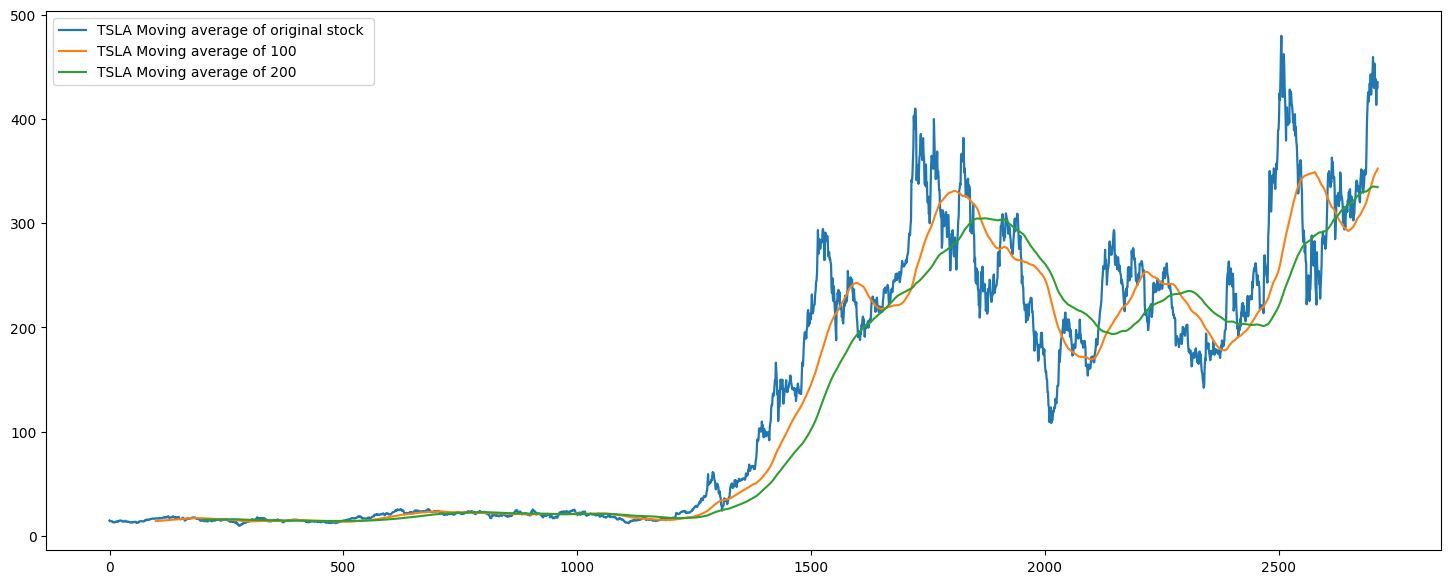

(1899, 1)

In [37]:
#---------------------------- INPUT AND DATE WINDOW ---------------------------
stock=input("Enter the stock Name: ").upper()
start=dt.datetime(2015,1,1)
end=dt.datetime(2025,10,16)
print()
print()
print(f"--------------------------  The information about {stock}  ----------------------------- ")
#------------------------------- DOWNLOAD THE STOCK DATA -------------------------------
df=yf.download(stock,start,end)
df=df.reset_index() # CONVERTS THE DATA INTO MORE READABLE AND EASY TO PLOT
display(df.head(2))
display(df.tail(2))
display(df.shape)
df.to_csv("stock.csv",index=False)
data1=pd.read_csv("stock.csv")
#---------------------------- PLOTING THE DATA USING PLOTLY ------------------------------ 
fig=pg.Figure(data=[pg.Candlestick(
    x=data1['Date'], #SET THE X AXIS AS DATE COLUMN 
    open=data1['Open'],
    high=data1['High'],
    low=data1['Low'],
    close=data1['Close'],
    name=stock)]) # NAME LABEL
fig.update_layout(
    title=f"{stock} stock price movement",
    xaxis_title="Date",
    yaxis_title="Price",
    xaxis_rangeslider_visible=False
)
fig.show()
# fig.write_image("stock_graph.png")

#------------------- MOVING AVERAGE: IT IS USED TO FORECAST THE UPCOMING DAYS PRICE OF STOCKS ------------------
temp_df=[10,20,30,40,50,60,70,80,90,100,110]
x=len(temp_df)
for i in range(x-4): # TAKES 5 CONSECUTIVE DATA AND FINDS THEIR AVG AND MOVE TO FIND SHORT TERM FLUCTUATION 
    ma=(temp_df[i]+temp_df[i+1]+temp_df[i+2]+temp_df[i+3]+temp_df[i+4])/5
    print(ma)
    i+=1
ma100=df.Close.rolling(100).mean() # LAST 100 DAYS AVG CLOSING PRICE 
ma200 =df.Close.rolling(200).mean() # LAST 200 DAYS AVG CLOSING PRICE 
plt.figure(figsize=(18,7))
plt.plot(df.Close,label=f'{stock} Moving average of original stock ',linewidth=1.6)
plt.plot(ma100,label=f'{stock} Moving average of 100 ',linewidth=1.5)
plt.plot(ma200,label=f'{stock} Moving average of 200 ',linewidth=1.5)
plt.legend()
plt.show()

#----------------------------- SPLIT THE DATA INTO TRAINING AND TESTING SETS ----------------------------
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
# display(data_training.shape)
# display(data_testing.shape)
# ------------------- APPLY MIN-MAX SCALING ---------------------------------
# USE OF MinMaxScaler(): IT SCALES THE NUMERIC DATA FROM 0 TO 1 TO TRAIN AND OPERATE THE DATA MORE EFFICIENTLY
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range=(0,1))
data_training_array=Scaler.fit_transform(data_training)
display(data_training_array.shape)
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]): # data_training_array.shape[0] GIVES TOTAL NUMBER OF DATA POITS 
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
# ------------------------------- CONVERT LISTS INTO NUMPY ARRAYS FOR NEURAL NETWORKS ---------------------------------
x_train,y_train=np.array(x_train),np.array(y_train)


In [38]:
#-------------------------------------- MODEL BUILDING ----------------------------------------
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
# ---------------------- MODEL INITIALIZATION ------------------------
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True)) #Rectified Linear Unit (RelU) activation function makes learning faster and helps avoid vanishing gradients
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.summary()
model.compile(optimizer='adam',loss='mean_squared_error') #Adam (Adaptive Moment Estimation)
model.fit(x_train,y_train,epochs=5) # One epoch means the model has seen all training data once. So epochs=50 → it will go through the entire training data 50 time

c:\Users\faisal\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 100)            │        72,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,661 (604.14 KB)

 Trainable params: 154,661 (604.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 16s 148ms/step - loss: 0.0232
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - loss: 0.0057
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - loss: 0.0050
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 153ms/step - loss: 0.0050
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 153ms/step - loss: 0.0045


Ticker,TSLA
0,266.923340
1,269.956665
2,290.143341
3,288.123322
4,293.296661


(814, 100, 1)

(814,)

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step


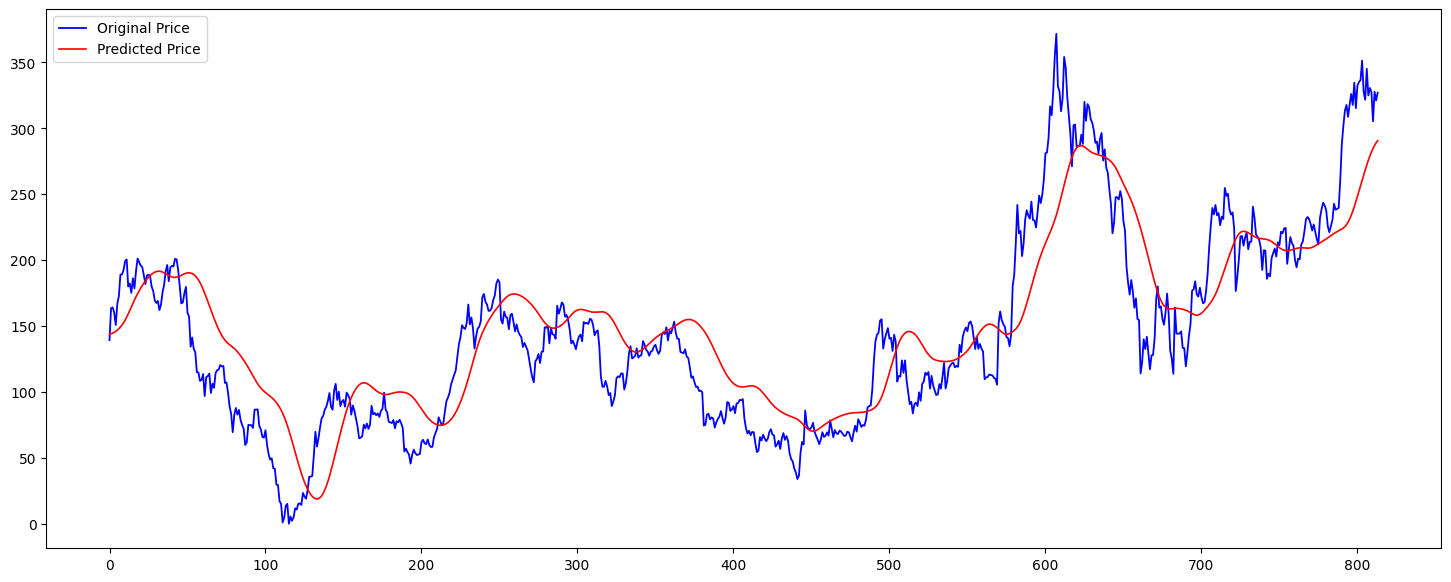

In [40]:
past_100_days=data_training.tail(100)
final_df=pd.concat([past_100_days,data_testing],ignore_index=True)
input_data=Scaler.fit_transform(final_df)
display(final_df.head(5))
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)
display(x_test.shape)
display(y_test.shape)
y_predicted=model.predict(x_test)
Scaler.scale_
scaler_factor=1/0.00268991
y_predicted=y_predicted*scaler_factor
y_test=y_test*scaler_factor
plt.figure(figsize=(18,7))
plt.plot(y_test,label='Original Price',linewidth=1.3,color='blue')
plt.plot(y_predicted,label='Predicted Price',linewidth=1.2,color='red')
plt.legend()
plt.show()
model.save('stock_dl_model.h5')